In [359]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, Aer, assemble, execute, BasicAer
from qiskit_textbook.tools import array_to_latex
from qiskit.tools.visualization import plot_histogram
import numpy as np

(15) Implement Deutsch-Jozsa Algorithm for $f:\{0,1\}^3 \rightarrow \{0,1\}$ where $f(x)=1$ for all $x$ and the starting state is $|0 \rangle |0 \rangle$. Show the circuit and state vector.

In [360]:
# Constructing the oracle
oracleCircuit = QuantumCircuit(4)
oracleCircuit.x(3)
#converting oracle to a gate
oracleGate = oracleCircuit.to_gate()
oracleGate.name = "Constant Oracle"

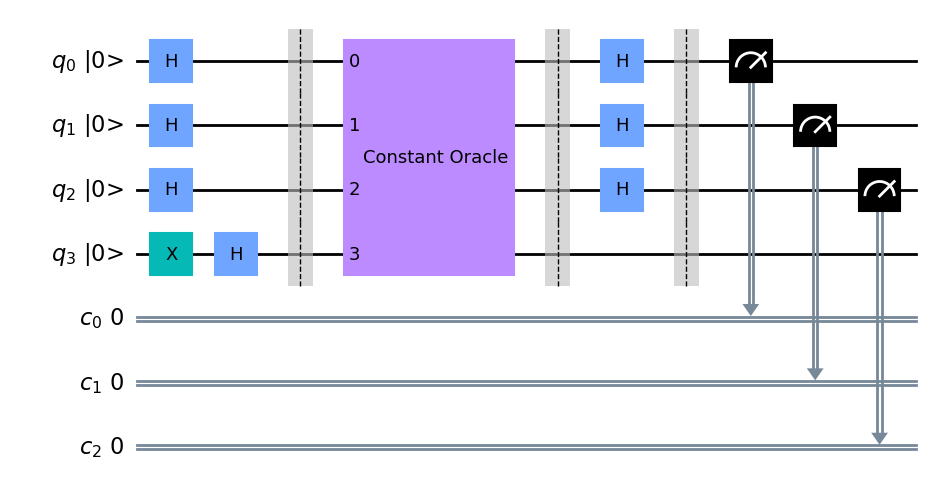

In [361]:
mainCircuit = QuantumCircuit(4, 3)

mainCircuit.x(3)
mainCircuit.h(3)

mainCircuit.h(0)
mainCircuit.h(1)
mainCircuit.h(2)

# Statevector before entering
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result1 = svsim.run(qobj).result().get_statevector()

mainCircuit.barrier()

mainCircuit.append(oracleGate, range(4))

mainCircuit.barrier()

# Statevector after exit
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result2 = svsim.run(qobj).result().get_statevector()


mainCircuit.h(0)
mainCircuit.h(1)
mainCircuit.h(2)

mainCircuit.barrier()

for i in range(3):
    mainCircuit.measure(i, i)

mainCircuit.draw(initial_state=True, cregbundle=False, output='mpl') 

In [362]:
array_to_latex(result1, pretext="\\text{Before Oracle} = ")  
array_to_latex(result2, pretext="\\text{After Oracle} = ")  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [363]:
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result = svsim.run(qobj).result().get_statevector()
array_to_latex(result, pretext="\\text{Final Statevector} = ")  

<IPython.core.display.Math object>

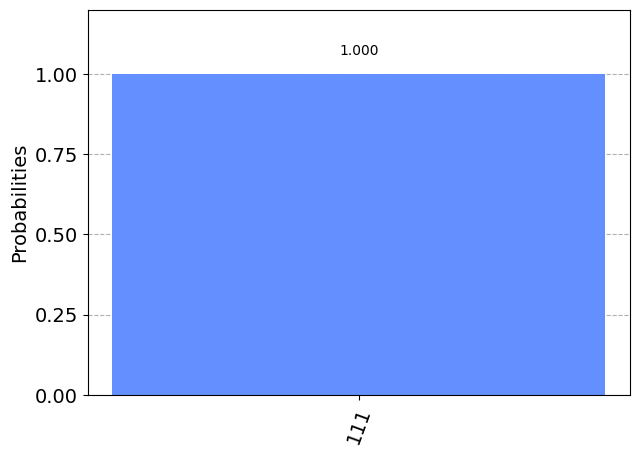

In [364]:
transpiled_circuit = transpile(mainCircuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

(15) Implement Deutsch-Jozsa Algorithm for any balanced function $f:\{0,1\}^3 \rightarrow \{0,1\}$ (starting state is $|0 \rangle |0 \rangle$). Show the circuit and state vector.


In [412]:
oracleCircuit = QuantumCircuit(4)

# generating a number to wrap CNOTs in X-gates
cnots = np.random.randint(1,8)
# convert to binary string
cnots_bits = format(cnots, '0'+str(3)+'b')

# if bit = 0 -> do nothing
# if bit = 1 -> apply X gate
for qubit in range(len(cnots_bits)):
    if cnots_bits[qubit] == '1':
        oracleCircuit.x(qubit)

# add CNOT gates
for qubit in range(3):
    oracleCircuit.cx(qubit, 3)

# if bit = 0 -> do nothing
# if bit = 1 -> apply X gate
for qubit in range(len(cnots_bits)):
    if cnots_bits[qubit] == '1':
        oracleCircuit.x(qubit)

oracleGate = oracleCircuit.to_gate()
oracleGate.name = "Balanced Oracle"

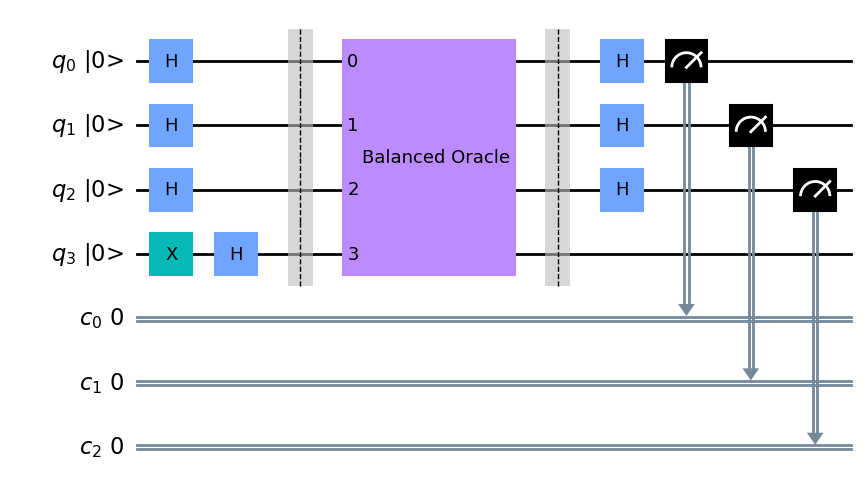

In [413]:
mainCircuit = QuantumCircuit(4, 3)

mainCircuit.x(3)
mainCircuit.h(3)

mainCircuit.h(0)
mainCircuit.h(1)
mainCircuit.h(2)

# Statevector before entering
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result1 = svsim.run(qobj).result().get_statevector()

mainCircuit.barrier()

mainCircuit.append(oracleGate, range(4))

# Statevector after exit
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result2 = svsim.run(qobj).result().get_statevector()

mainCircuit.barrier()

mainCircuit.h(0)
mainCircuit.h(1)
mainCircuit.h(2)

for i in range(3):
    mainCircuit.measure(i, i)

mainCircuit.draw(initial_state=True, cregbundle=False, output='mpl')

In [414]:
array_to_latex(result1, pretext="\\text{Before Oracle} = ")  
array_to_latex(result2, pretext="\\text{After Oracle} = ")  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [415]:
svsim = Aer.get_backend('statevector_simulator')
test = transpile(mainCircuit, svsim)
qobj = assemble(test)
result = svsim.run(qobj).result().get_statevector()
array_to_latex(result, pretext="\\text{Final Statevector} = ")  

<IPython.core.display.Math object>

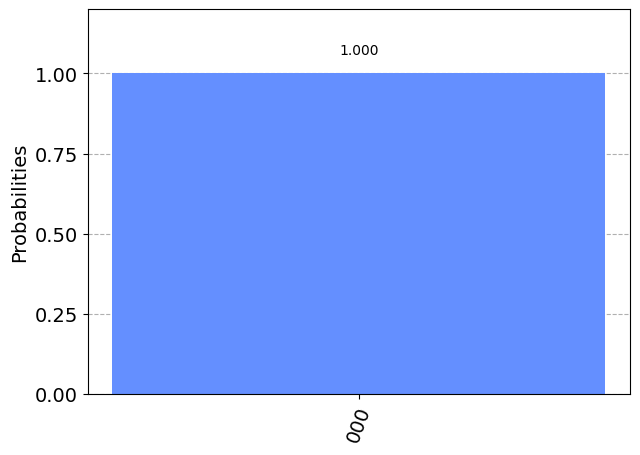

In [416]:
transpiled_circuit = transpile(mainCircuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

(20) Built QFT circuit for 3 qubits. Make sure to put the Swap gate in the end so that the final qubits are in the right allignment. Show the circuit and action of circuit as matrix.

In [417]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1)
ctgate = TGate().control(1)

backend = Aer.get_backend('unitary_simulator')

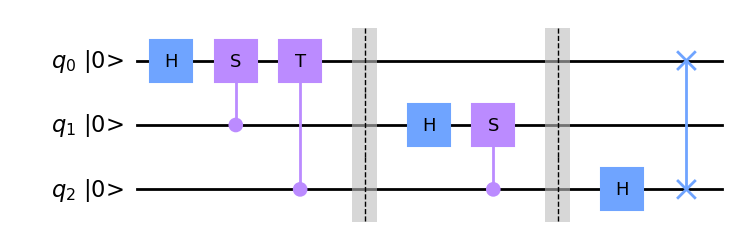

In [418]:
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.append(csgate,[1,0])
circuit.append(ctgate,[2,0])
circuit.barrier()

circuit.h(1)
circuit.append(csgate,[2,1])
circuit.barrier()

circuit.h(2)

circuit.swap(0,2)
circuit.draw(initial_state=True, cregbundle=False, output='mpl')


In [419]:
job = execute(circuit, backend, shots=10000)
result = job.result()

print(result.get_unitary(circuit,3))

Operator([[ 0.354+0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,
            0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ],
          [ 0.354+0.j   ,  0.354-0.j   ,  0.354-0.j   ,  0.354-0.j   ,
           -0.354+0.j   , -0.354+0.j   , -0.354+0.j   , -0.354+0.j   ],
          [ 0.354+0.j   ,  0.354-0.j   , -0.354+0.j   , -0.354+0.j   ,
            0.   +0.354j,  0.   +0.354j, -0.   -0.354j, -0.   -0.354j],
          [ 0.354+0.j   ,  0.354-0.j   , -0.354+0.j   , -0.354+0.j   ,
           -0.   -0.354j, -0.   -0.354j,  0.   +0.354j,  0.   +0.354j],
          [ 0.354+0.j   , -0.354+0.j   ,  0.   +0.354j, -0.   -0.354j,
            0.25 +0.25j , -0.25 -0.25j , -0.25 +0.25j ,  0.25 -0.25j ],
          [ 0.354+0.j   , -0.354+0.j   ,  0.   +0.354j, -0.   -0.354j,
           -0.25 -0.25j ,  0.25 +0.25j ,  0.25 -0.25j , -0.25 +0.25j ],
          [ 0.354+0.j   , -0.354+0.j   , -0.   -0.354j,  0.   +0.354j,
           -0.25 +0.25j ,  0.25 -0.25j ,  0.25 +0.25j , -0.25 -0.25j ],